In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from __future__ import print_function
%matplotlib inline
from matplotlib import colors as c
fs=20
font={'family' : 'serif', 'size' : fs}  #define font for legend\\n\",\n",
plt.rc('font', **font)

In [2]:
from mpl_toolkits.basemap import Basemap
# import via conda install basemap (for some reason pip doesnt work)

In [3]:
import sys
climber_path='/home/peter/PIK/climber/'#/home/peter/PIK/climber
sys.path.append(climber_path+"data_preparation/future/")
from only_create_P_hum_file_future_homogeneous import r, regions
from only_create_P_hum_file_future_homogeneous import get_lat_lon_agg_ssp
from only_create_P_hum_file_future_homogeneous import get_Energy
from only_create_P_hum_file_future_homogeneous import get_climber_grid
from only_create_P_hum_file_script_homogeneous import area_lon
from only_create_P_hum_file_future_homogeneous import get_g
from only_create_P_hum_file_future_homogeneous import *

In [4]:
grid=get_climber_grid(climber_path=climber_path)
#Note: This complicated meshgrid definition is because the dimension of x and y needs to be one bigger than lats, lons plotted (boundaries)
#X,Y=np.meshgrid(np.append(data.xt_i, 360+(data.xt_i[1]-data.xt_i[0])/2),np.append(data.yt_j, 90+(data.yt_j[1]-data.yt_j[0])/2))
X,Y=np.meshgrid(np.insert(grid.xu_i, 0, 0.), grid.yu_j)

In [5]:
def change_to_Atl(x, grid=grid):
    new_x=np.copy(x)
    #print(np.shape(new_x))
    switch=np.where(grid.xt_i>180)[0][0]
    for i in range(0,len(grid.xt_i)):
        if grid.xt_i[i]>180:
            new_x[:,i-switch]=x[:,i]
            #print(i-switch)
        else:
            new_x[:,i+switch]=x[:,i]
            #print(i+switch)
    return new_x
frlnd_atl=change_to_Atl(grid.frlnd[0])
X_atl=X-180
Y_atl=Y

In [6]:
#plt.pcolormesh(X_atl, Y_atl, frlnd_atl)

In [7]:
crosses_x=[]
crosses_y=[]
for i in range(0,16):
    for j in range(0,24):
        a=grid.xt_i[i].values-180
        crosses_x.append(a)
        crosses_y.append(grid.yt_j[j].values)

In [11]:
def run(dataset):
    fig=plt.figure(figsize=(8,5))
    ax=fig.add_subplot(111)
    m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m.drawcoastlines(ax=ax)
    ax.set_xticks([X_atl[0,:][0],X_atl[0,:][len(X_atl[0,:])/4],X_atl[0,:][len(X_atl[0,:])/2],X_atl[0,:][len(X_atl[0,:])/4*3], X_atl[0,:][-1]])
    ax.set_yticks([Y_atl[:,0][0],Y_atl[:,0][len(Y_atl[:,0])/4],Y_atl[:,0][len(Y_atl[:,0])/2],Y_atl[:,0][len(Y_atl[:,0])/4*3], Y_atl[:,0][-1]])
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.plot(crosses_x[:], crosses_y[:], 'x', ms=2, color='black', alpha=0.5)
    ax.set_title("World Regions in "+dataset)

    if dataset=="SSP":
        from only_create_P_hum_file_future_homogeneous import r, regions
        col={"as":'b',"lam": 'r', "mea":'g', "oecd":'brown', "ref":'c', "w":'k'}
        r_regions=r[:-1]
    elif dataset=="WB":
        from only_create_P_hum_file_script_homogeneous import get_lat_lon_agg
        r=['w', 'ssa', 'sa', 'na', 'mena', 'lac', 'eca', 'eap-aus', 'aus']
        r_regions=r[1:]
        col={'w':'k','ssa':'darkgreen', 'sa':'lightblue', 'na':'darkorange', 'mena':'lightgreen', 'lac':'red',
         'eca':'chocolate', 'eap-aus':'darkblue', 'aus':'yellow'}
    print(r_regions)
    c_colorbar=[col[reg] for reg in r_regions]
    c_colorbar.insert(0,'white')  
    cMap = c.ListedColormap(c_colorbar)
    array=0+0*grid.frlnd[0]
    for n,reg in enumerate(r_regions):
        if dataset=="SSP":
            array+=(n+1)*get_lat_lon_agg_ssp(reg, grid.frlnd[0])
        elif dataset=="WB":
            array+=(n+1)*get_lat_lon_agg(reg, grid.frlnd[0])
    array_atl=change_to_Atl(array)
    plot=ax.pcolormesh(X_atl,Y_atl,array_atl, cmap=cMap, vmin=-0.5,vmax=len(r)-0.5, alpha=0.6)

    #cbaxes = fig.add_axes([0.9, 0.22, 0.02, 0.65]) 
    #cbar=fig.colorbar(plot,ax=ax, cax=cbaxes)
    #cbar.ax.set_yticklabels(np.insert(r_regions,0,""))  # vertically oriented colorbar
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    cb=plt.colorbar(plot, cax=cax)#, label="$W/m^2$")
    cb.ax.set_yticklabels(np.insert(r_regions,0,""))  # vertically oriented colorba

    fig.tight_layout()
    if dataset=="SSP": s="FUTURE"
    if dataset=="WB": s="PAST"
    ax.text(0.7, 0.02, s, transform=ax.transAxes,  
            fontdict=dict(weight='heavy',  color="red"))
    #bbox=dict(color='red', alpha=1, fill=False),
    plt.savefig("visualisation"+dataset+"_setup.png", format='png', bbox_inches='tight')
    return 


['as', 'lam', 'mea', 'oecd', 'ref']
['ssa', 'sa', 'na', 'mena', 'lac', 'eca', 'eap-aus', 'aus']


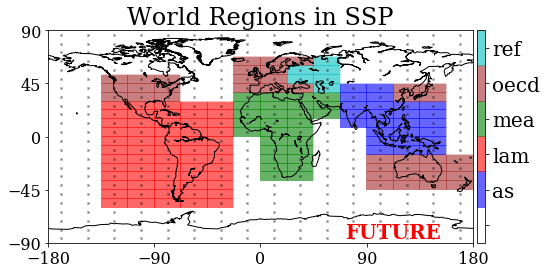

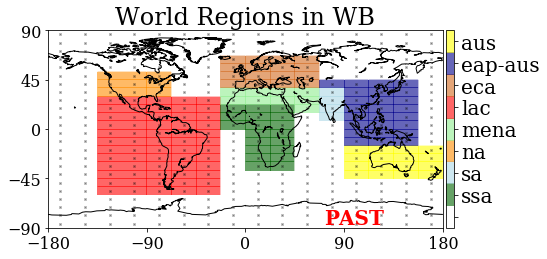

In [12]:
dataset="SSP"
run(dataset)
dataset="WB"
run(dataset)